In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/home/majji-vinaykumar/Documents/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


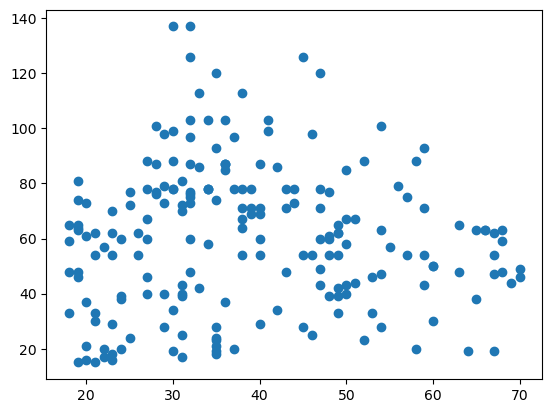

In [3]:
plt.scatter(df["Age"],df["Annual Income (k$)"])
plt.show()

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [32]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
df.iloc[:,2:4] = scalar.fit_transform(df.iloc[:,2:4])

In [33]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,0.019231,0.000000,39,3
1,2,Male,0.057692,0.000000,81,3
2,3,Female,0.038462,0.008197,6,3
3,4,Female,0.096154,0.008197,77,3
4,5,Female,0.250000,0.016393,40,3
...,...,...,...,...,...,...
195,196,Female,0.326923,0.860656,79,5
196,197,Female,0.519231,0.909836,28,5
197,198,Male,0.269231,0.909836,74,5
198,199,Male,0.269231,1.000000,18,5


In [35]:
x = df.iloc[:,2:4].values

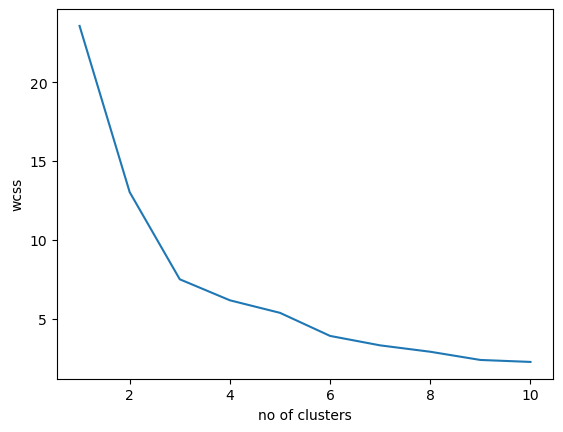

In [36]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.xlabel("no of clusters")
plt.ylabel("wcss")
plt.show()

In [37]:
kmeans = KMeans(n_clusters=6,random_state=0)
y_kmeans = kmeans.fit_predict(x)

In [38]:
y_kmeans

array([3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 3, 3, 0, 3, 2, 3,
       2, 3, 2, 3, 3, 3, 2, 3, 3, 0, 2, 2, 2, 0, 3, 2, 0, 3, 0, 2, 0, 3,
       2, 0, 3, 3, 0, 2, 0, 0, 0, 4, 2, 1, 4, 2, 0, 1, 0, 2, 4, 2, 2, 4,
       1, 2, 0, 4, 2, 1, 4, 4, 2, 4, 2, 4, 4, 2, 0, 4, 2, 4, 0, 2, 0, 0,
       0, 4, 1, 4, 4, 4, 0, 2, 2, 2, 4, 1, 1, 1, 4, 4, 1, 1, 0, 1, 1, 1,
       4, 4, 4, 4, 1, 4, 4, 1, 0, 4, 4, 4, 4, 4, 1, 4, 1, 1, 1, 1, 1, 1,
       1, 4, 1, 4, 1, 4, 0, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 4,
       0, 4, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5], dtype=int32)

In [39]:
df["cluster"] = y_kmeans

In [40]:
df1 = df[df["cluster"]==0]
df2 = df[df["cluster"]==1]
df3 = df[df["cluster"]==2]
df4 = df[df["cluster"]==3]
df5 = df[df["cluster"]==4]
df6 = df[df["cluster"]==5]

In [41]:
df1

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
8,9,Male,0.884615,0.032787,3,0
10,11,Male,0.942308,0.032787,14,0
30,31,Male,0.807692,0.122951,4,0
40,41,Female,0.903846,0.188525,35,0
53,54,Male,0.788462,0.229508,60,0
57,58,Male,0.980769,0.237705,46,0
60,61,Male,1.000000,0.254098,56,0
62,63,Female,0.942308,0.262295,52,0
64,65,Male,0.865385,0.270492,51,0
67,68,Female,0.961538,0.270492,48,0


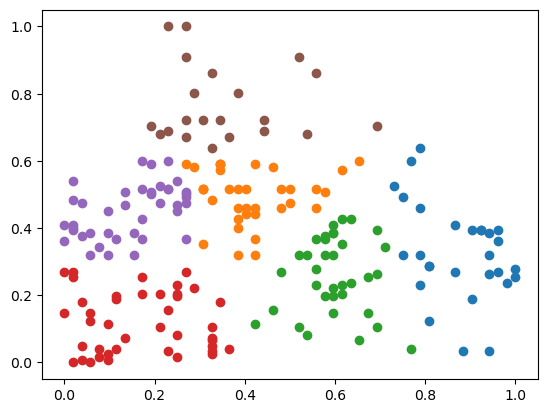

In [42]:
plt.scatter(df1["Age"],df1["Annual Income (k$)"])
plt.scatter(df2["Age"],df2["Annual Income (k$)"])
plt.scatter(df3["Age"],df3["Annual Income (k$)"])
plt.scatter(df4["Age"],df4["Annual Income (k$)"])
plt.scatter(df5["Age"],df5["Annual Income (k$)"])
plt.scatter(df6["Age"],df6["Annual Income (k$)"])
plt.show()